In [65]:
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

# Loading the data

### The data collected for this analysis come from WHO and also from the biggest infant's hospital in Panama called "Hospital del Niño".

In [77]:
column_names = ['cause', 'total', 'male', 'female', 'total-x-age', '0-12 months', '1-4 years', '5-9 years', '10-14 years', '15+ years']
selected_columns = ['cause', '0-12 months']

urgencias_hosp_ninno_df = pd.read_csv(
    '../data/raw/causas-frecuentes-en-el-cuarto-de-urgencias-2022.csv', encoding='latin-1', sep=';', header=0, names=column_names, usecols=selected_columns)

urgencias_hosp_ninno_df.head()

,cause,0-12 months
0,asma,81
1,bronconeumonia,24
2,bronquiolitis,2966
3,bronquitis,182
4,conjuntivitis,94


In [ ]:
preprocessed_urgencias_hosp_ninno_df = (
    urgencias_hosp_ninno_df
    .drop('total', )
)

In [67]:
neonatal_deaths_df = pd.read_excel(
    '../data/raw/Number of neonatal deaths - by cause.xlsx', sheet_name='Data')

neonatal_deaths_df.head()

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of neonatal deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-28 Days,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),11933.010000,11933.010000
1,Number of neonatal deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-28 Days,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),2392.263000,2392.263000
2,Number of neonatal deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-28 Days,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),393.212300,393.212300
3,Number of neonatal deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-28 Days,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),0.240009,0.240009
4,Number of neonatal deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-28 Days,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),4492.082000,4492.082000


### Lets explore neonatal dataset

In [68]:
neonatal_deaths_df.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                     float64
WHO region                  object
World bank income group     object
Age group                   object
Cause                       object
Datasource short            object
Datasource long             object
Value Numeric              float64
Value String               float64
dtype: object

In [69]:
(
    neonatal_deaths_df
    .dtypes
    .value_counts()
)

object     8
float64    3
int64      1
Name: count, dtype: int64

In [70]:
neonatal_deaths_df.shape

(54320, 12)

In [71]:
(
    neonatal_deaths_df
    .isnull()
    .any()
)

Indicator                  False
Year                       False
Country                    False
Global                      True
WHO region                 False
World bank income group     True
Age group                  False
Cause                      False
Datasource short           False
Datasource long            False
Value Numeric              False
Value String               False
dtype: bool

In [72]:
(
    neonatal_deaths_df
    .isnull()
    .sum()
)

Indicator                      0
Year                           0
Country                        0
Global                     54320
WHO region                     0
World bank income group      840
Age group                      0
Cause                          0
Datasource short               0
Datasource long                0
Value Numeric                  0
Value String                   0
dtype: int64

In [73]:
(
    neonatal_deaths_df
    .isnull()
)

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
54315,False,False,False,True,False,False,False,False,False,False,False,False
54316,False,False,False,True,False,False,False,False,False,False,False,False
54317,False,False,False,True,False,False,False,False,False,False,False,False
54318,False,False,False,True,False,False,False,False,False,False,False,False


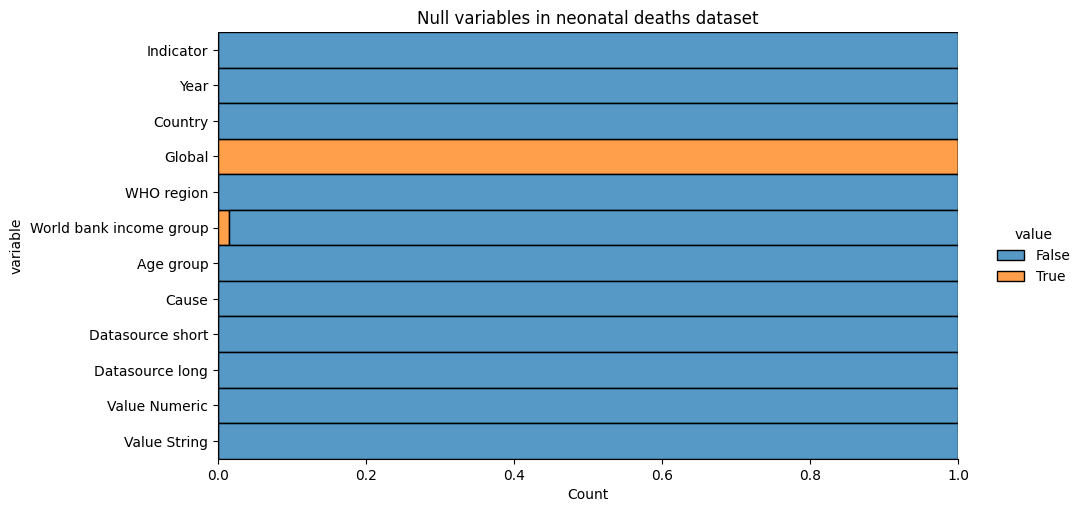

In [74]:
(
    neonatal_deaths_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect=2
                )
            )
            .set(title='Null variables in neonatal deaths dataset')
        )
)

In [75]:
neonatal_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                54320 non-null  object 
 1   Year                     54320 non-null  int64  
 2   Country                  54320 non-null  object 
 3   Global                   0 non-null      float64
 4   WHO region               54320 non-null  object 
 5   World bank income group  53480 non-null  object 
 6   Age group                54320 non-null  object 
 7   Cause                    54320 non-null  object 
 8   Datasource short         54320 non-null  object 
 9   Datasource long          54320 non-null  object 
 10  Value Numeric            54320 non-null  float64
 11  Value String             54320 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.0+ MB


### Drop unnecessary columns from the dataframe

In [76]:
preprocessed_neonatal_deaths_df = (
    neonatal_deaths_df
    .drop('Indicator', axis=1)
    .drop('Global', axis=1)
    .drop('Datasource short', axis=1)
    .drop('Datasource long', axis=1)
    .drop('Value String', axis=1)
)

preprocessed_neonatal_deaths_df.head()

,Year,Country,WHO region,World bank income group,Age group,Cause,Value Numeric
0,2000,Afghanistan,Eastern Mediterranean,Low income,0-28 Days,Birth asphyxia and birth trauma,11933.010000
1,2000,Afghanistan,Eastern Mediterranean,Low income,0-28 Days,Tetanus,2392.263000
2,2000,Afghanistan,Eastern Mediterranean,Low income,0-28 Days,Injuries,393.212300
3,2000,Afghanistan,Eastern Mediterranean,Low income,0-28 Days,HIV/AIDS,0.240009
4,2000,Afghanistan,Eastern Mediterranean,Low income,0-28 Days,Sepsis and other infectious conditions of the ...,4492.082000
